In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

## Preparing Datasets

In [ ]:
# milk = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv',
#             index_col='Month', parse_dates=True)
# milk.columns = ['production']
# milk.index.name = 'month'
# milk.to_csv('../../datasets/Ch9/milk_production.csv')

# file = Path('../../datasets/Ch8/air_passenger.csv')
# df = pd.read_csv(file, index_col='date', parse_dates=True)
# df.to_csv('../../datasets/Ch9/air_passenger.csv')


# weather = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/nz_weather.csv',
#                      index_col='DATE', parse_dates=True)
# weather.to_csv('../../datasets/Ch9/weather.csv')

# pd.read_csv('https://api.covidtracking.com/v1/us/daily.csv', index_col='date', parse_dates=True).to_csv('../../datasets/Ch9/covid.csv')

# Smoothing Time Series Data

In [560]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmspe, rmse, aic, bic
from sklearn.metrics import mean_absolute_percentage_error as mape
plt.rcParams["figure.figsize"] = [12, 6]

In [561]:
file = Path('../../datasets/Ch9/milk_production.csv')
milk = pd.read_csv(file, 
                   index_col='month', 
                   parse_dates=True)

In [562]:
milk.shape

(168, 1)

In [563]:
milk.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [564]:
milk.tail()

,production
month,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


<AxesSubplot:xlabel='month'>

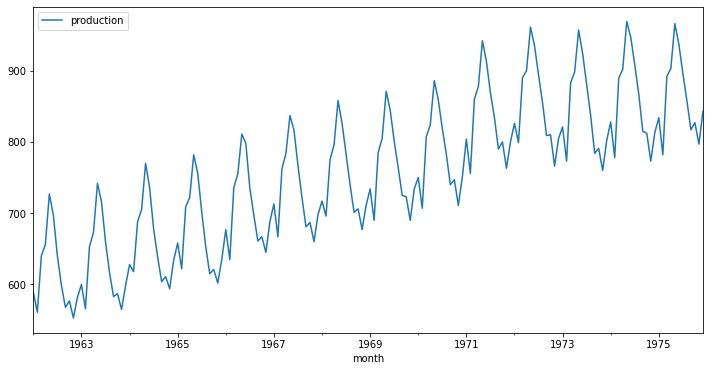

In [565]:
milk.plot()

In [566]:
x_train = milk.iloc[:-12]
x_test = milk.iloc[-12:]
print(x_train.shape[0],
     x_test.shape[0])

156 12


## Single Exponential Smoothing

In [567]:
alphas = np.linspace(0.0, 1.0, 21)
results = {}
for alpha in alphas:
    alpha = round(alpha,2)
    ses = SimpleExpSmoothing(x_train['production'].values).fit(
                             smoothing_level=alpha,
                             optimized=False)
    forecast  = ses.forecast(12)
    forecast = forecast.reshape(-1,1)
    score = {'rmspe': rmspe(x_test.values, forecast), 
             'rmse':rmse(x_test.values, forecast),
            'mape': mape(x_test.values, forecast),
            'aic': exp.aic, 
            'bic': exp.bic}
    
             
    results[alpha] = (ses,forecast, score)

In [568]:
initial_score = results[0][2]['mape']
best_alpha = 0
for k,v in results.items():
    if v[2]['mape'] < initial_score:
        initial_score = v[2]['mape']
        best_alpha = k
    print(f'for alpha={k} RMSPE={v[2]["rmspe"]} RMSE={v[2]["rmse"]} MAPE={v[2]["mape"]} BIC={v[2]["bic"]}')
print(f'Best alpha: {best_alpha} with lowest MAPE score: {initial_score}')

for alpha=0.0 RMSPE=[3.17417625] RMSE=[278.9758054] MAPE=0.3145787834281828 BIC=1197.3006410963544
for alpha=0.05 RMSPE=[0.64528881] RMSE=[58.79874811] MAPE=0.052381968052971885 BIC=1197.3006410963544
for alpha=0.1 RMSPE=[0.63050192] RMSE=[57.02407775] MAPE=0.05205899395017604 BIC=1197.3006410963544
for alpha=0.15 RMSPE=[0.64055462] RMSE=[58.25348] MAPE=0.05218593873263208 BIC=1197.3006410963544
for alpha=0.2 RMSPE=[0.66003037] RMSE=[60.41719003] MAPE=0.05291096281171931 BIC=1197.3006410963544
for alpha=0.25 RMSPE=[0.68771145] RMSE=[63.27043501] MAPE=0.0545241127546493 BIC=1197.3006410963544
for alpha=0.3 RMSPE=[0.72064758] RMSE=[66.49878205] MAPE=0.057084832861440254 BIC=1197.3006410963544
for alpha=0.35 RMSPE=[0.75472802] RMSE=[69.73212624] MAPE=0.059954767485075555 BIC=1197.3006410963544
for alpha=0.4 RMSPE=[0.78622412] RMSE=[72.6584988] MAPE=0.06294317703324548 BIC=1197.3006410963544
for alpha=0.45 RMSPE=[0.81264717] RMSE=[75.08101809] MAPE=0.06558580143982731 BIC=1197.300641096354

In [569]:
results[best_alpha][0].summary()

Dep. Variable:,endog,No. Observations:,156
Model:,SimpleExpSmoothing,SSE,633029.815
Optimized:,False,AIC,1300.113
Trend:,None,BIC,1306.213
Seasonal:,None,AICC,1300.378
Seasonal Periods:,None,Date:,"Mon, 06 Dec 2021"
Box-Cox:,False,Time:,02:20:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
initial_level,589.00000,l.0,False


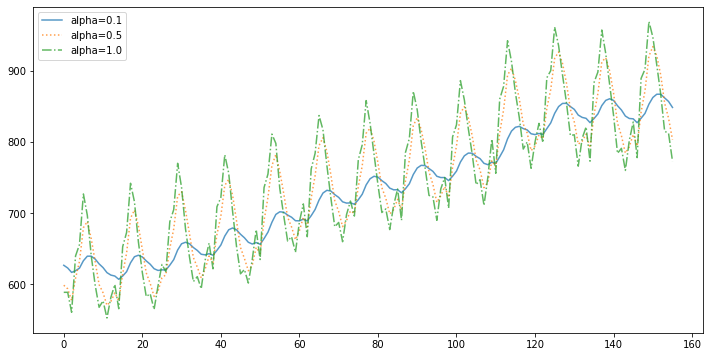

In [548]:
styles = ['-', ':', '-.']
for i, style in zip([best_alpha, 0.5, 1.0], styles):
    plt.plot(results[i][0].fittedvalues, style, label=f'alpha={i}', alpha=0.75)
plt.legend()

In [446]:
import warnings
warnings.filterwarnings('ignore')

In [447]:
x_test['ses'] = results[best_alpha][1]

In [448]:
x_train['ses'] = results[best_alpha][0].fittedvalues

In [449]:
x_train.head()

,production,ses
month,,
1962-01-01,589,589.000
1962-02-01,561,589.000
1962-03-01,640,586.200
1962-04-01,656,591.580
1962-05-01,727,598.022


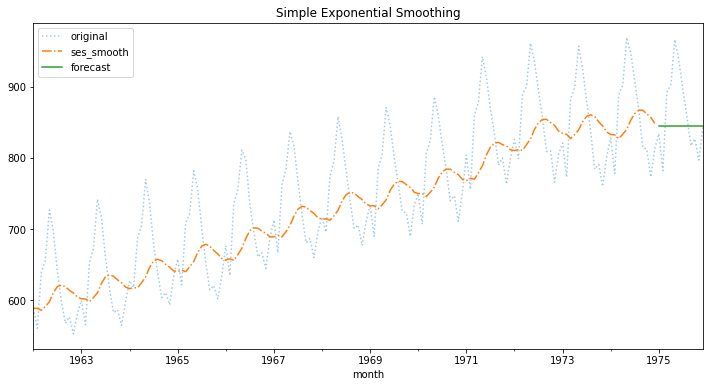

In [495]:
ax = milk.plot(style=':', alpha=0.4, title=r'Simple Exponential Smoothing')
x_train['ses'].plot(style='-.', ax=ax)
x_test['ses'].plot(ax=ax)
plt.legend(['original','ses_smooth', 'forecast'])
plt.show()


**Automated Optimization**

In [451]:
ses = SimpleExpSmoothing(x_train['production'].values).fit(
                        optimized=True,
                        use_brute=True)
ses.summary()

Dep. Variable:,endog,No. Observations:,156
Model:,SimpleExpSmoothing,SSE,314934.000
Optimized:,True,AIC,1191.201
Trend:,None,BIC,1197.301
Seasonal:,None,AICC,1191.466
Seasonal Periods:,None,Date:,"Mon, 06 Dec 2021"
Box-Cox:,False,Time:,00:27:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,589.00000,l.0,True


In [452]:
x_test['ses_auto'] = ses.forecast(12)
x_train['ses_auto'] = ses.fittedvalues

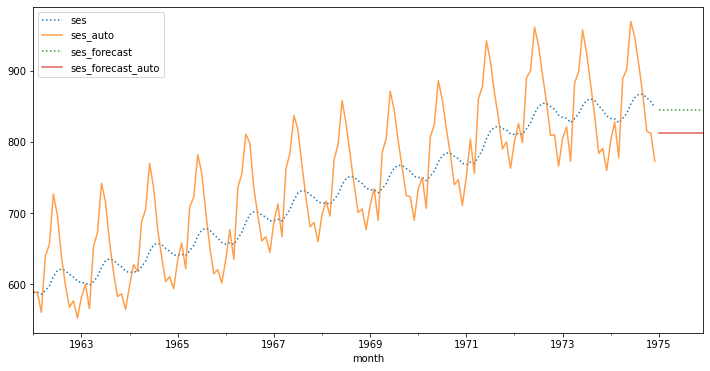

In [453]:
# ax = milk.plot(style=':', alpha=0.4, title=r'SES with $\alpha$ = 0.2')
ax = x_train['ses'].plot(style=':')
x_train['ses_auto'].plot(style='-', alpha=0.75)
x_test['ses'].plot(ax=ax, style=':')
x_test['ses_auto'].plot(ax=ax, style='-', alpha=0.75)
plt.legend(['ses', 'ses_auto', 'ses_forecast', 'ses_forecast_auto'])
plt.show()


## Double/Holt

In [570]:
holt = Holt(x_train['production'].values, 
            damped_trend=True, 
            exponential=True).fit(
                                optimized=True,
                                use_brute=True)
holt.summary()

Dep. Variable:,endog,No. Observations:,156
Model:,Holt,SSE,322518.659
Optimized:,True,AIC,1200.913
Trend:,Multiplicative,BIC,1216.163
Seasonal:,None,AICC,1201.670
Seasonal Periods:,None,Date:,"Mon, 06 Dec 2021"
Box-Cox:,False,Time:,02:25:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9952675,alpha,True
smoothing_trend,0.0224286,beta,True


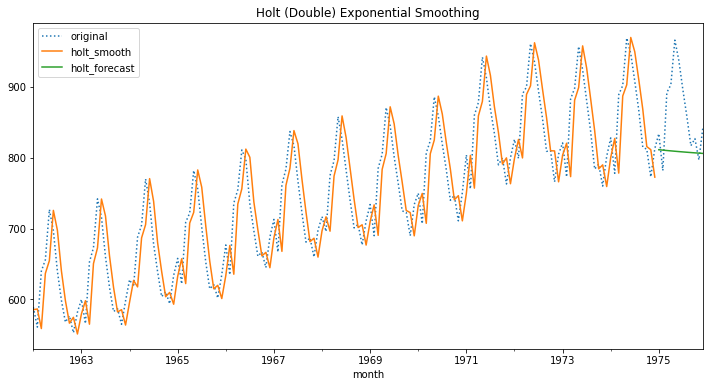

In [553]:
x_test['holt'] = holt.forecast(12)
x_train['holt'] = holt.fittedvalues

ax = milk.plot(style=':', title=r'Holt (Double) Exponential Smoothing')
x_train['holt'].plot(style='-', ax=ax)
x_test['holt'].plot(ax=ax)
plt.legend(['original','holt_smooth', 'holt_forecast'])
plt.show()


In [458]:
x_test['holt_auto'] = holt.forecast(12)
x_train['holt_auto'] = holt.fittedvalues

In [459]:
x_train

,production,ses,ses_auto,holt,holt_auto
month,,,,,
1962-01-01,589,589.000000,589.000000,592.598708,592.598708
1962-02-01,561,589.000000,589.000000,591.285977,591.285977
1962-03-01,640,586.200000,561.000000,562.011381,562.011381
1962-04-01,656,591.580000,639.999999,644.049711,644.049711
1962-05-01,727,598.022000,656.000000,661.024699,661.024699
...,...,...,...,...,...
1974-08-01,867,866.912970,908.000001,911.425833,911.425833
1974-09-01,815,866.921673,867.000001,868.314738,868.314738
1974-10-01,812,861.729505,815.000001,813.836134,813.836134


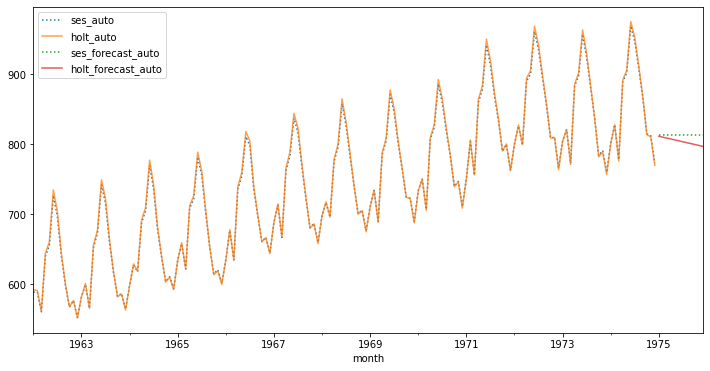

In [460]:
ax = x_train['ses_auto'].plot(style=':')
x_train['holt_auto'].plot(style='-', alpha=0.75) 
x_test['ses_auto'].plot(ax=ax, style=':')
x_test['holt_auto'].plot(ax=ax, style='-', alpha=0.75)
plt.legend(['ses_auto', 'holt_auto', 'ses_forecast_auto', 'holt_forecast_auto'])
plt.show()

In [461]:
trend = ['mul', 'add']
seasonal = ['mul', 'add']
periods = [3, 6, 12]
from itertools import permutations, combinations, product

In [462]:
for i in product(*[trend, seasonal, periods]):
    print(i)

('mul', 'mul', 3)
('mul', 'mul', 6)
('mul', 'mul', 12)
('mul', 'add', 3)
('mul', 'add', 6)
('mul', 'add', 12)
('add', 'mul', 3)
('add', 'mul', 6)
('add', 'mul', 12)
('add', 'add', 3)
('add', 'add', 6)
('add', 'add', 12)


In [470]:
combos = [i for i in product(*[trend, seasonal, periods])]

In [471]:
combos

[('mul', 'mul', 3),
 ('mul', 'mul', 6),
 ('mul', 'mul', 12),
 ('mul', 'add', 3),
 ('mul', 'add', 6),
 ('mul', 'add', 12),
 ('add', 'mul', 3),
 ('add', 'mul', 6),
 ('add', 'mul', 12),
 ('add', 'add', 3),
 ('add', 'add', 6),
 ('add', 'add', 12)]

In [472]:
results = {}
for i, (t, s, p )in enumerate(combos):
    exp = ExponentialSmoothing(x_train['production'].values, 
                           seasonal_periods=p, 
                           trend=t, 
                           seasonal=s).fit(optimized= True, use_brute = True)
    
    forecast = exp.forecast(12)
    scores = {
        'rmse': rmse(x_test['production'].values, forecast),
        'mape': mape(x_test['production'].values, forecast),
        'rmspe': rmspe(x_test['production'].values, forecast),
        'aic': exp.aic,
        'bic': exp.bic
    }
    results[i+1] = [exp, forecast, scores]

In [474]:
initial_score = results[1][2]['mape']
model = 0
for k,v in results.items():
    if v[2]['mape'] < initial_score:
        initial_score = v[2]['mape']
        model = k
    print(f'for model #{k} RMSPE={v[2]["rmspe"]} RMSE={v[2]["rmse"]} MAPE={v[2]["mape"]} BIC={v[2]["bic"]}')
print(f'Best model: {model} with lowest MAPE score: {initial_score}')

for model #1 RMSPE=0.8760635917710862 RMSE=81.04085160685197 MAPE=0.07005410305282346 BIC=1236.1391868425662
for model #2 RMSPE=0.9519209415633176 RMSE=87.17896070038331 MAPE=0.07928853295163621 BIC=1240.84400296209
for model #3 RMSPE=0.20507238224411584 RMSE=18.64549374423235 MAPE=0.01734909080750633 BIC=715.4975078159159
for model #4 RMSPE=0.8866364962062728 RMSE=81.9221579230537 MAPE=0.07176417750320684 BIC=1236.6128442318786
for model #5 RMSPE=1.1081378698769595 RMSE=100.38378433415681 MAPE=0.09932428595604946 BIC=1255.9291967497102
for model #6 RMSPE=0.14009885363480248 RMSE=12.201843911476406 MAPE=0.012454948478549388 BIC=694.6511603670413
for model #7 RMSPE=0.958025452476301 RMSE=88.08033469921868 MAPE=0.08061945312357859 BIC=1236.0661557243993
for model #8 RMSPE=1.0143434115961938 RMSE=92.54045981278688 MAPE=0.08767127602915346 BIC=1243.2349564280807
for model #9 RMSPE=0.20001271352490063 RMSE=18.13900860929705 MAPE=0.01710784925179348 BIC=714.8526817520046
for model #10 RMSPE=

In [476]:
results[12][0].summary()

Dep. Variable:,endog,No. Observations:,156
Model:,ExponentialSmoothing,SSE,7936.316
Optimized:,True,AIC,644.978
Trend:,Additive,BIC,693.776
Seasonal:,Additive,AICC,649.971
Seasonal Periods:,12,Date:,"Mon, 06 Dec 2021"
Box-Cox:,False,Time:,00:30:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6987165,alpha,True
smoothing_trend,5.8361e-09,beta,True


## Holt-Winters (Triple Exponential Smoothing)

In [477]:
# exp = ExponentialSmoothing(x_train['production'].values, 
#                            seasonal_periods=12, 
#                            trend='mul', 
#                            seasonal='mul').fit(optimized= True, use_brute = True)
# exp.summary()

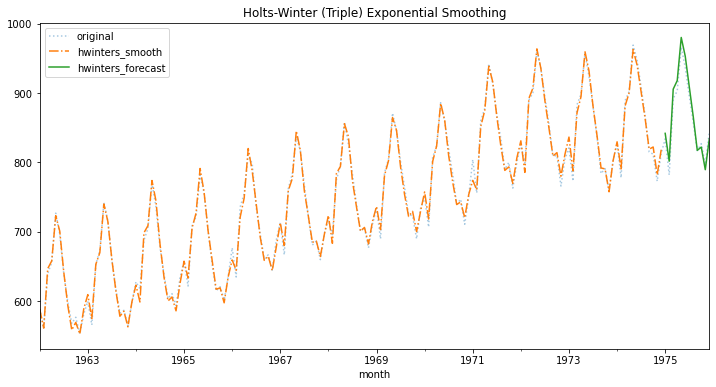

In [497]:
model = results[12][0]
x_test['hwinters'] = model.forecast(12)
x_train['hwinters'] = model.fittedvalues

ax = milk.plot(style=':', alpha=0.4, title=f'Holts-Winter (Triple) Exponential Smoothing')
x_train['hwinters'].plot(style='-.', ax=ax)
x_test['hwinters'].plot(ax=ax)
plt.legend(['original','hwinters_smooth', 'hwinters_forecast'])
plt.show()

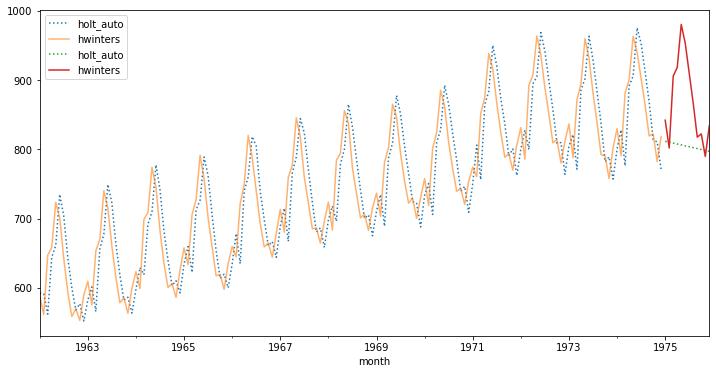

In [498]:

ax = x_train['holt_auto'].plot(style=':')
x_train['hwinters'].plot(ax=ax, style='-', alpha=0.60)
x_test['holt_auto'].plot(ax=ax, style=':')
x_test['hwinters'].plot(ax=ax, style='-')

plt.legend()

### There is more

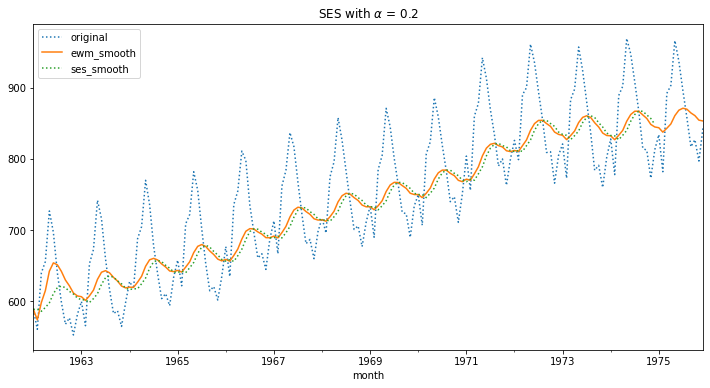

In [507]:
ax = milk.plot(style=':', title=r'SES with $\alpha$ = 0.2')
milk.ewm(alpha=0.1).mean().plot(style='-', ax=ax)
x_train['ses'].plot(ax=ax, style=':')
plt.legend(['original','ewm_smooth', 'ses_smooth'])
plt.show()

In [508]:
from sklearn.model_selection import ParameterGrid

In [520]:
for a in ParameterGrid({'trend': trend, 'seasonal': seasonal, 'periods':periods}):
    print(a)

{'periods': 3, 'seasonal': 'mul', 'trend': 'mul'}
{'periods': 3, 'seasonal': 'mul', 'trend': 'add'}
{'periods': 3, 'seasonal': 'add', 'trend': 'mul'}
{'periods': 3, 'seasonal': 'add', 'trend': 'add'}
{'periods': 6, 'seasonal': 'mul', 'trend': 'mul'}
{'periods': 6, 'seasonal': 'mul', 'trend': 'add'}
{'periods': 6, 'seasonal': 'add', 'trend': 'mul'}
{'periods': 6, 'seasonal': 'add', 'trend': 'add'}
{'periods': 12, 'seasonal': 'mul', 'trend': 'mul'}
{'periods': 12, 'seasonal': 'mul', 'trend': 'add'}
{'periods': 12, 'seasonal': 'add', 'trend': 'mul'}
{'periods': 12, 'seasonal': 'add', 'trend': 'add'}


In [521]:
exp = ExponentialSmoothing(x_train['production'].values).fit(optimized= True, use_brute = True)
exp.summary()

Dep. Variable:,endog,No. Observations:,156
Model:,ExponentialSmoothing,SSE,314934.000
Optimized:,True,AIC,1191.201
Trend:,None,BIC,1197.301
Seasonal:,None,AICC,1191.466
Seasonal Periods:,None,Date:,"Mon, 06 Dec 2021"
Box-Cox:,False,Time:,01:26:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,589.00000,l.0,True


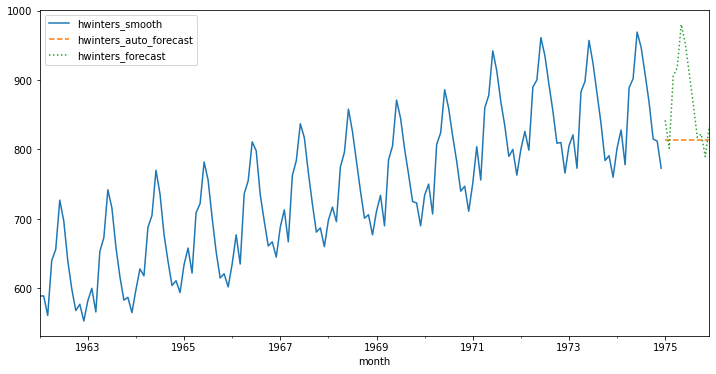

In [532]:
x_train['hwinters_auto'] = exp.fittedvalues
x_test['hwinters_auto'] = exp.forecast(12)
ax = x_train['hwinters_auto'].plot(label='hwinters_smooth')
x_test['hwinters_auto'].plot(ax=ax, label='hwinters_auto_forecast', style='--')
x_test['hwinters'].plot(ax=ax, label='hwinters_forecast', style=':')
plt.legend()